#Instructions

This file runs all experiments for check-worthiness presented in my thesis: *Covid-19: We might need to check that!*. The results for the experiments are:

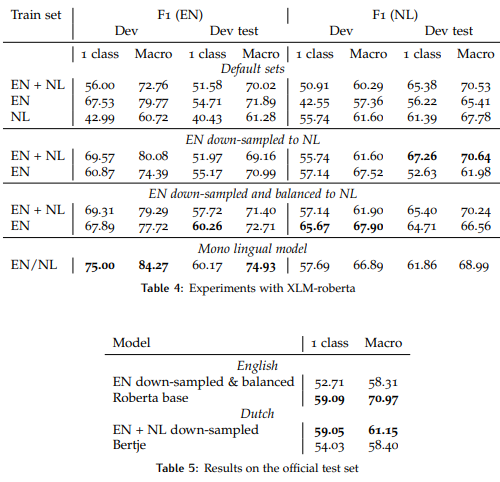

If you would like to reproduce these results, follow these steps:

1.   If you are using Google Colab mount the Drive to the folder where you have all Github files stored. Otherwise cd to the folder where you have all Github files stored.
2.   Run all cells under **Imports and Data**.
3.   Under **Configuration** set the model type. If you would like to run an experiment with a multilingual model set this to *xlmroberta*. For bertje set this to *bert*, and for Roberta-base set this to *roberta*. Set the model_dir to the directory where the model is present. On Github you can find all models under "releases". Each model is named *dataManipulation_TrainLanguage_ModelType*. Lastly, set eval_set to the dataset you would like to evaluate on. This can be *data_off_test* (official English test-set), *data_test* (the dev-test set) or *data_dev* for English. For evaluating on a Dutch set this can be *data_nl_off_test*, *data_nl_test* or *data_nl_dev*.
4.   Run the cell under **Configuration** as well as the cell under **Run Experiment**.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/MyDrive/Remi/

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1WJLnwO7mUn1QFbhFIJ6fMZjZWuCKf1ub/Remi


#Imports and Data

In [2]:
!pip install simpletransformers

import torch
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.metrics import classification_report, f1_score
import pandas as pd
import logging
from sklearn.utils import shuffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 32.5 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 7.6 MB 56.2 MB/s 
     |████████████████████████████████| 1.9 MB 60.1 MB/s 
     |████████████████████████████████| 1.3 MB 62.9 MB/s 
     |████████████████████████████████| 441 kB 62.5 MB/s 
     |████████████████████████████████| 9.2 MB 57.3 MB/s 
     |████████████████████████████████| 5.3 MB 67.0 MB/s 
     |████████████████████████████████| 163 kB 73.3 MB/s 
     |████████████████████████████████| 182 kB 70.1 MB/s 
     |████████████████████████████████| 166 kB 67.8 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 166 kB 66.6 MB/s 
     |████████████████████████████████| 162 kB 77.2 MB/s 
     |████████████████████████████████| 162 kB 71.8 MB/s 
     |█████████████████████████████

In [7]:
# Loading data for English

data_off_test = pd.read_csv('clef2022-checkthat-lab-main/task1/data/subtasks-english/test/CT22_english_1A_checkworthy_test_gold.tsv', sep='\t')
data_off_test.rename(columns={"tweet_text":"text", "class_label":"label"} ,inplace=True)

data_test = pd.read_csv('clef2022-checkthat-lab-main/task1/data/subtasks-english/CT22_english_1A_checkworthy_dev_test.tsv', sep='\t')
data_test.rename(columns={"tweet_text":"text", "class_label":"label"} ,inplace=True)

data_dev = pd.read_csv('clef2022-checkthat-lab-main/task1/data/subtasks-english/CT22_english_1A_checkworthy_dev.tsv', sep='\t')
data_dev.rename(columns={"tweet_text":"text", "class_label":"label"} ,inplace=True)

# Loading data for Dutch

data_nl_off_test = pd.read_csv('clef2022-checkthat-lab-main/task1/data/subtasks-dutch/test/CT22_dutch_1A_checkworthy_test_gold.tsv', sep='\t')
data_nl_off_test.rename(columns={"tweet_text":"text", "class_label":"label"} ,inplace=True)

data_nl_test = pd.read_csv('clef2022-checkthat-lab-main/task1/data/subtasks-dutch/CT22_dutch_1A_checkworthy_dev_test.tsv', sep='\t')
data_nl_test.rename(columns={"tweet_text":"text", "class_label":"label"} ,inplace=True)

data_nl_dev = pd.read_csv('clef2022-checkthat-lab-main/task1/data/subtasks-dutch/CT22_dutch_1A_checkworthy_dev.tsv', sep='\t')
data_nl_dev.rename(columns={"tweet_text":"text", "class_label":"label"} ,inplace=True)

# Configuration

In [13]:
model_type = "bert"
model_dir = "balancing_and_sampling_en-nl-xlmroberta"
eval_set = data_nl_test

#Run Experiment

In [14]:
cuda_available = torch.cuda.is_available()

model = ClassificationModel(
    model_type, model_dir, use_cuda=True, num_labels=2
)

predictions, raw_outputs = model.predict(eval_set['text'].tolist())
bert_report = classification_report(eval_set['label'].tolist(), predictions, digits=4)
print("Test results:")
print(bert_report)

  0%|          | 0/252 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Test results:
              precision    recall  f1-score   support

           0     0.7375    0.7867    0.7613       150
           1     0.6522    0.5882    0.6186       102

    accuracy                         0.7063       252
   macro avg     0.6948    0.6875    0.6899       252
weighted avg     0.7030    0.7063    0.7035       252

